In [101]:
import numpy as np

class LN():
    
    def __init__(self, mu, cov):
        self.mu = mu
        self.cov = cov
        self.C = np.power(2*np.pi,mu.size/2)
        
    def __call__(self, x):
        coeff1 = 1/(self.C * np.sqrt(self.cov.prod()))
        coeff2 = 1/(x*(1-x)).prod()
        logit = np.log(x/(1-x))
        e = np.exp(-0.5*(np.power(logit-self.mu,2)/self.cov).sum())
        return coeff1*coeff2*e
    
    def max_loc(self):
        return np.exp(self.mu)/(1+np.exp(self.mu))
    
    def maximum(self):
        m = self.max_loc()
        coeff1 = 1/(self.C * np.sqrt(self.cov.prod()))
        coeff2 = 1/(m*(1-m)).prod()
        return coeff1*coeff2
    
    def sample(self, num_samps=1):
        samples = []
        m = self.maximum()
        #print("m = ", m)
        while len(samples) < num_samps:
            x = np.random.uniform(size=self.mu.size)
            #print("x = ", x)
            r = np.random.uniform(m)
            #print("r = ", r)
            #print("call({}) = {}".format(x,self.__call__(x)))
            if r < self.__call__(x):
                samples.append(x)
        return np.array(samples)

In [215]:
logit_norm = LN(np.array(-1.0),np.array(0.1))

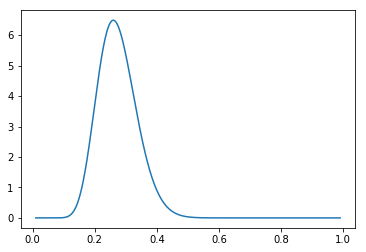

In [216]:
import matplotlib.pyplot as plt
xpts = np.linspace(0.01,0.99,1000)
plt.plot(xpts, [logit_norm(x) for x in xpts]); plt.show()

In [187]:
ypts= np.array([logit_norm(x) for x in xpts])

In [188]:
xpts[ypts.argmax()]

0.4995095095095095

In [150]:
ln_2d = LN(np.array([-1.75,0.75]),np.array([0.76,0.16]))

In [151]:
samples = ln_2d.sample(1000)

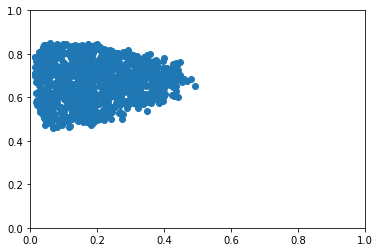

In [152]:
plt.scatter(samples[:,0], samples[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [112]:
samples.shape

(10000, 1)

In [16]:
m1 = logit_norm(np.array([xpts]))[0].max(); m1

2.4858328248168147

In [17]:
logit_norm.max_loc()

0.7005671424739729

In [18]:
m2 = logit_norm.maximum(); m2

2.3062500352372193

In [19]:
m1-m2

0.1795827895795954

In [20]:
0.68*0.68

0.4624000000000001